In [1]:
import numpy as np
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df = df.drop(["UDI","Product ID","Type"], axis=1, errors="ignore")
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,298.1,308.6,1551,42.8,0,0,No Failure
1,298.2,308.7,1408,46.3,3,0,No Failure
2,298.1,308.5,1498,49.4,5,0,No Failure
3,298.2,308.6,1433,39.5,7,0,No Failure
4,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Target                   10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [5]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
df.isnull().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

EDA

In [7]:
df.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [8]:
corr_df=df.corr()

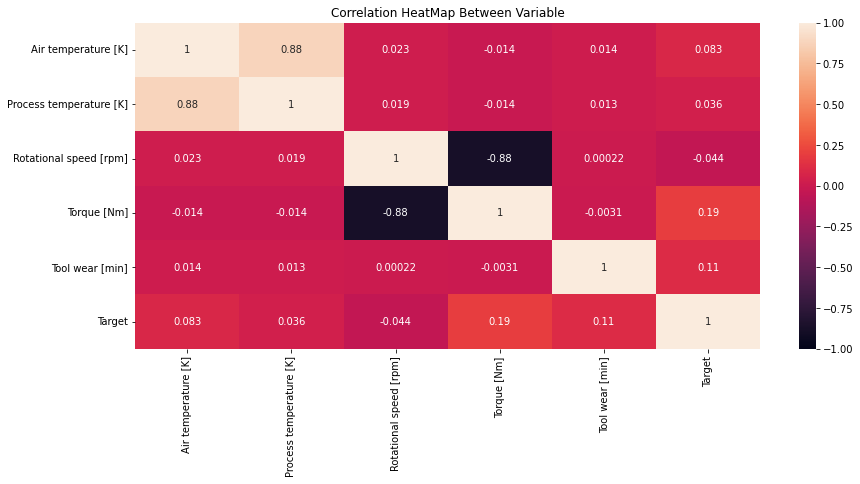

In [9]:
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df, annot=True, vmin=-1, vmax=1)
heatmap.set_title("Correlation HeatMap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()

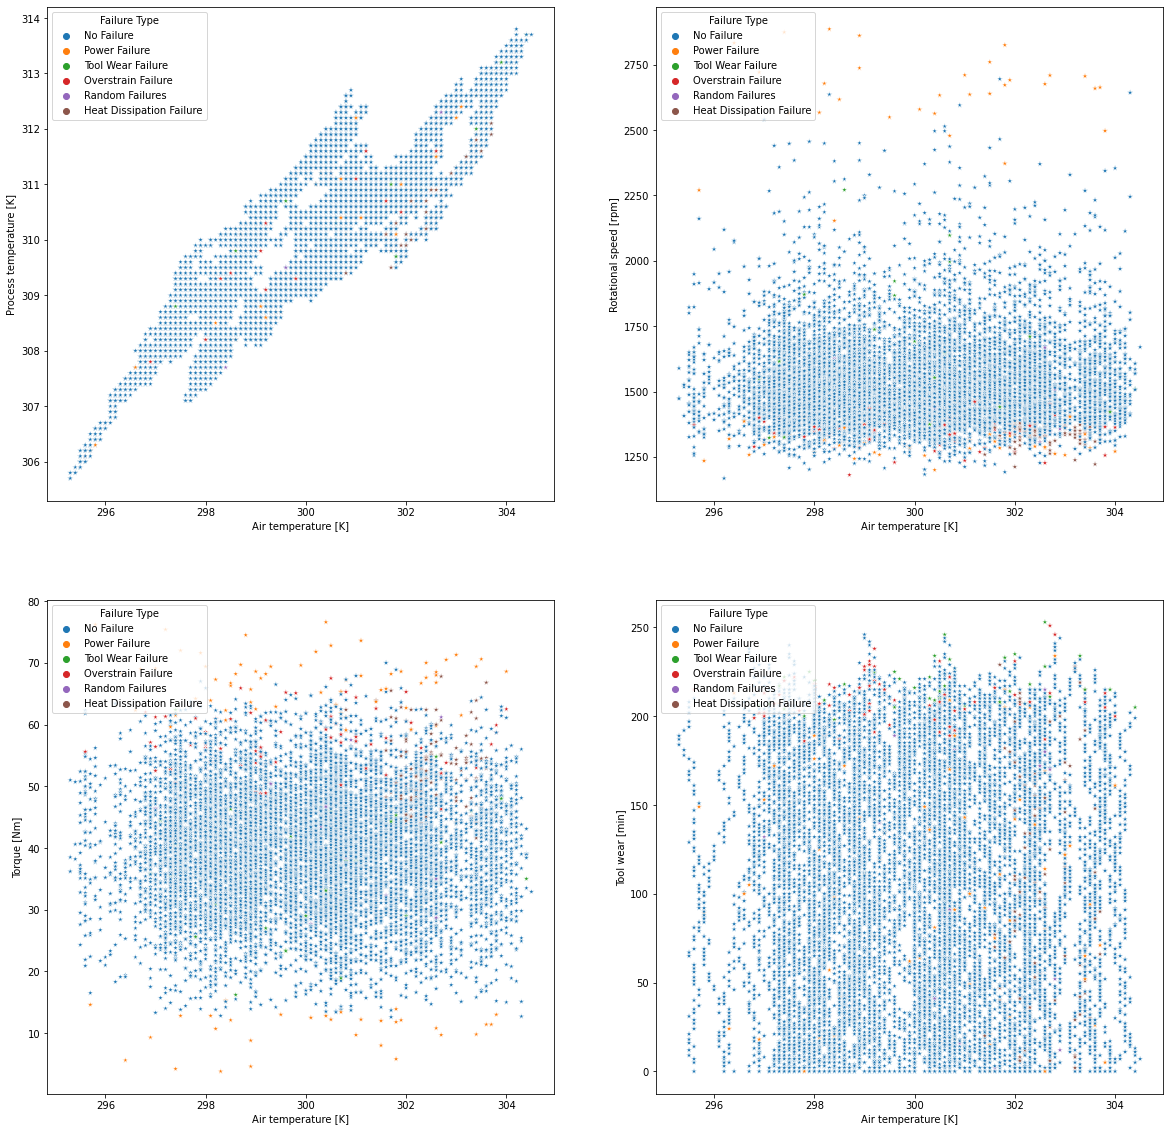

In [10]:
plt.figure(figsize=(20,20))

#Air temperature vs Process Temperature
plt.subplot(2,2,1)
sns.scatterplot(data=df,x='Air temperature [K]',y='Process temperature [K]',marker='*',hue='Failure Type')

# Air temperature VS Rotational speed
plt.subplot(2,2,2)
sns.scatterplot(data=df,x='Air temperature [K]',y='Rotational speed [rpm]',marker='*',hue='Failure Type')


#'Air temperature [K] vs Torque [Nm]'
plt.subplot(2,2,3)
sns.scatterplot(data=df,x='Air temperature [K]',y='Torque [Nm]',marker='*',hue='Failure Type')

#'Air temperature [K]' vs 'Tool wear [min]
plt.subplot(2,2,4)
sns.scatterplot(data=df,x='Air temperature [K]',y='Tool wear [min]',marker='*',hue='Failure Type')

plt.show()

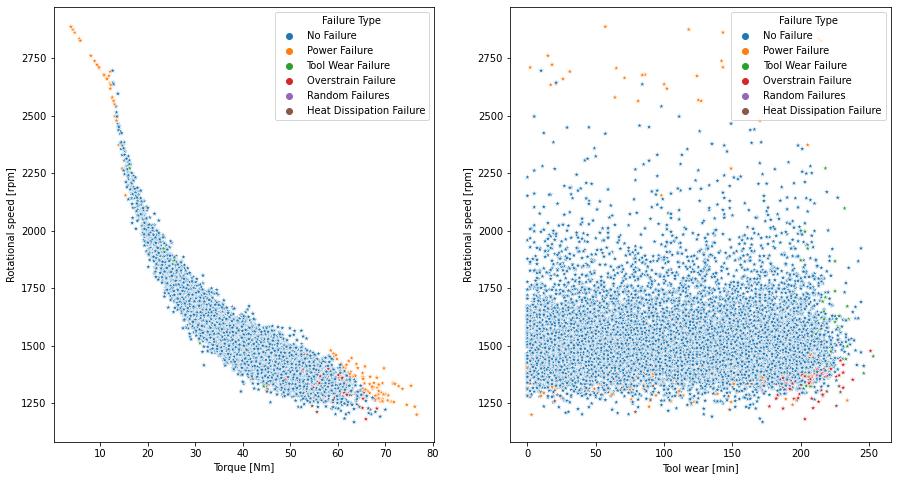

In [11]:
plt.figure(figsize=(15,8))

#Torque [Nm] vs RPM
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='Torque [Nm]',y='Rotational speed [rpm]',marker='*',hue='Failure Type')

#Tool wear [min] vs RPM
plt.subplot(1,2,2)
sns.scatterplot(data=df,x='Tool wear [min]',y='Rotational speed [rpm]',marker='*',hue='Failure Type')

plt.show()

<Axes: xlabel='Torque [Nm]', ylabel='Tool wear [min]'>

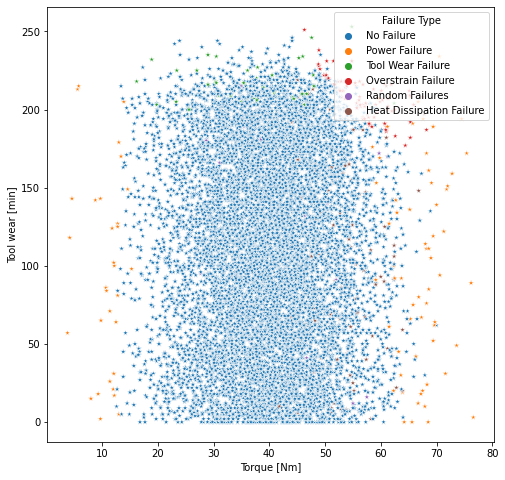

In [12]:
#'Torque [Nm]' vs 'Tool wear [min]'
plt.figure(figsize=(8,8))
sns.scatterplot(data= df, x='Torque [Nm]',y='Tool wear [min]', marker='*', hue='Failure Type')

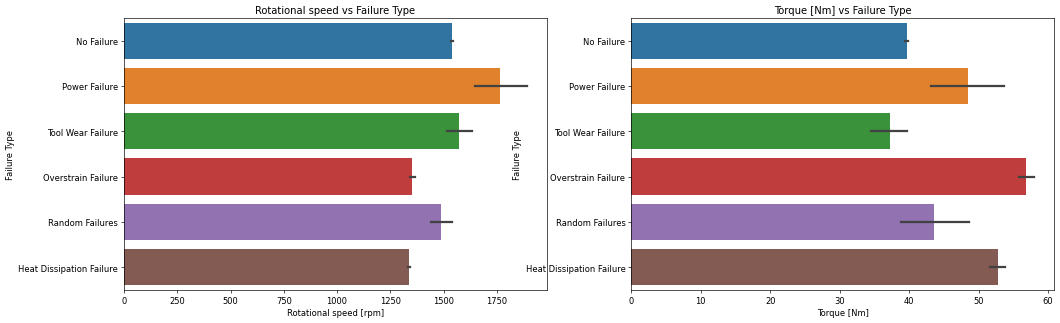

In [13]:
#'Rotational speed [rpm]' vs 'Failure Type'
plt.figure(figsize=(20,6),dpi=60)

plt.subplot(1,2,1)
plt.title('Rotational speed vs Failure Type')
sns.barplot(x='Rotational speed [rpm]',y='Failure Type',data=df)

plt.subplot(1,2,2)
plt.title('Torque [Nm] vs Failure Type')
sns.barplot(data=df,x='Torque [Nm]',y='Failure Type')

plt.show()

C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


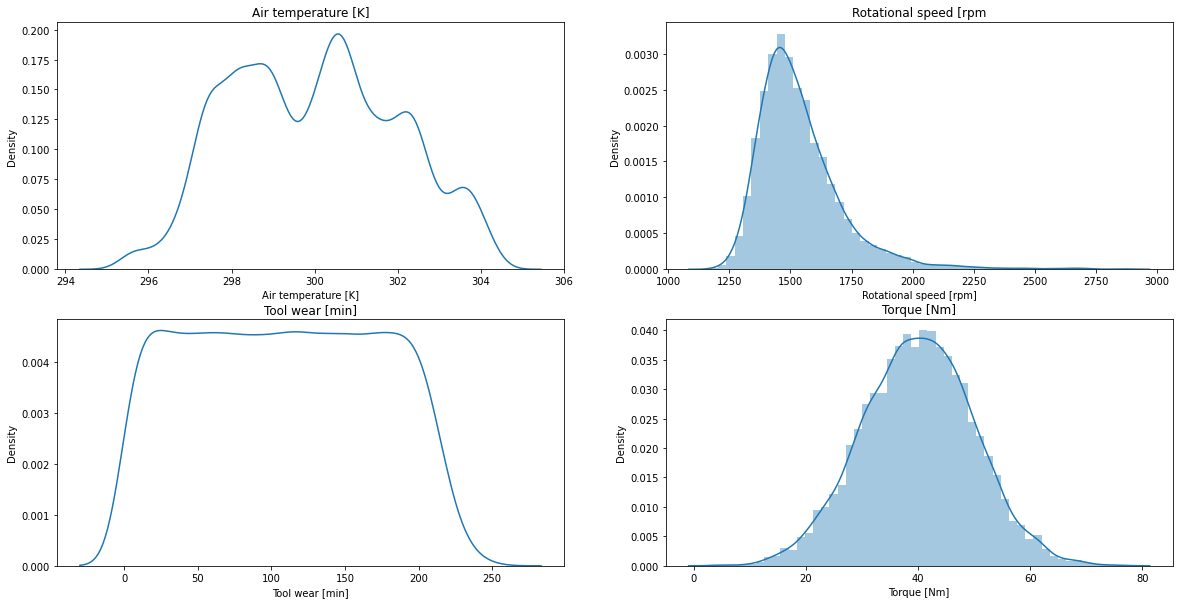

In [14]:
fig = plt.figure(figsize =(20, 10))

plt.subplot(2,2,1)
plt.title('Air temperature [K]')
sns.kdeplot(df['Air temperature [K]'])

plt.subplot(2,2,2)
plt.title('Rotational speed [rpm')
sns.distplot(df['Rotational speed [rpm]'])

plt.subplot(2,2,3)
plt.title('Tool wear [min]')
sns.kdeplot(df['Tool wear [min]'])

plt.subplot(2,2,4)
plt.title('Torque [Nm]')
sns.distplot(df['Torque [Nm]'])

plt.show()

checking for outliers

C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\itsas\Anaconda3\lib\si

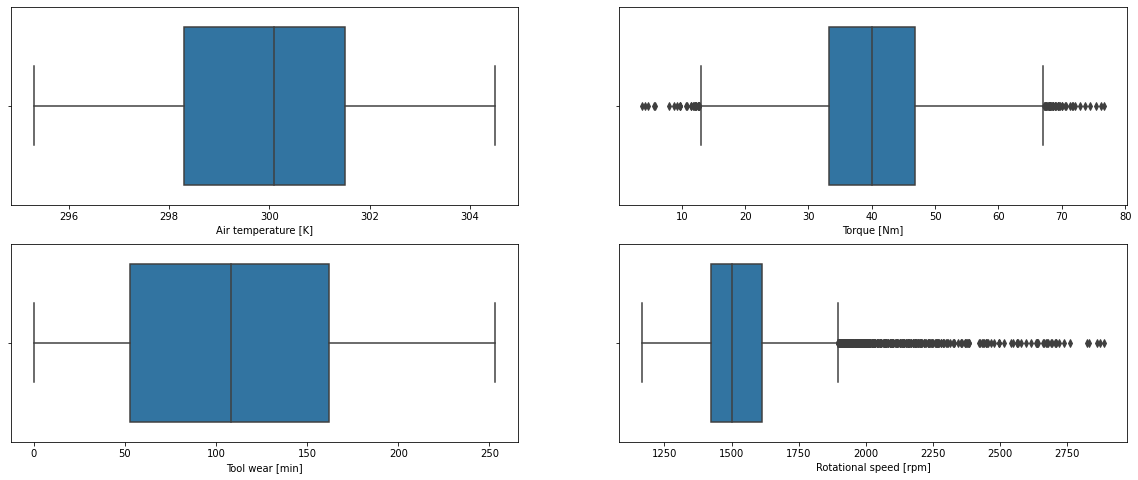

In [15]:
fig = plt.figure(figsize =(20, 8))

plt.subplot(2,2,1)
sns.boxplot(df['Air temperature [K]'])

plt.subplot(2,2,2)
sns.boxplot(df['Torque [Nm]'])

plt.subplot(2,2,3)
sns.boxplot(df['Tool wear [min]'])

plt.subplot(2,2,4)
sns.boxplot(df['Rotational speed [rpm]'])

plt.show()

Found outlier in Rotational speed and Torque:

Removing outliers using IQR method from Rotational speed column - 


In [16]:
Q1 = df['Rotational speed [rpm]'].quantile(0.25)
Q3 = df['Rotational speed [rpm]'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data_rotation  = df['Rotational speed [rpm]'].copy()
outlier_rotation = data_rotation[(data_rotation >= lower) & (data_rotation <= upper)]

outlier_rotation.shape

(9582,)

C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


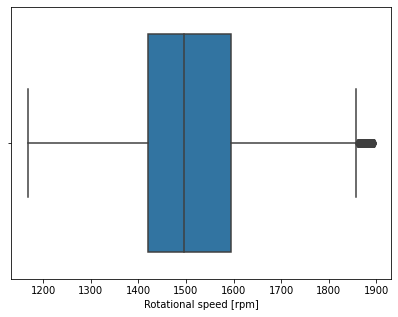

In [17]:
fig = plt.figure(figsize =(15, 5))

plt.subplot(1,2,1)
sns.boxplot(outlier_rotation)

plt.show()

In [18]:
outlier_rotation

0       1551
1       1408
2       1498
3       1433
4       1408
        ... 
9995    1604
9996    1632
9997    1645
9998    1408
9999    1500
Name: Rotational speed [rpm], Length: 9582, dtype: int64

In [19]:
Q1 = df['Torque [Nm]'].quantile(0.25)
Q3 = df['Torque [Nm]'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR



data_torque = df['Torque [Nm]'].copy()
outlier_torque = data_torque[(data_torque >= lower) & (data_torque <= upper)]

outlier_torque

0       42.8
1       46.3
2       49.4
3       39.5
4       40.0
        ... 
9995    29.5
9996    31.8
9997    33.4
9998    48.5
9999    40.2
Name: Torque [Nm], Length: 9931, dtype: float64

In [20]:
outlier_torque.shape

(9931,)

C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


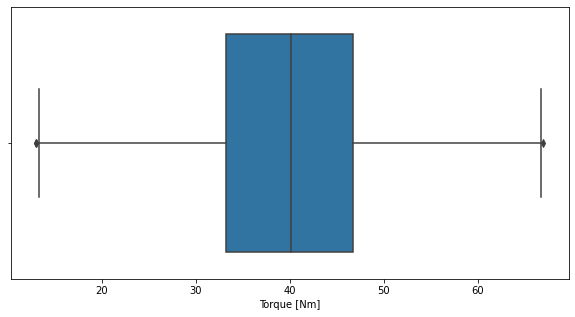

In [21]:
fig = plt.figure(figsize =(10, 5))
sns.boxplot(outlier_torque)
plt.show()

In [22]:
df['Rotational speed [rpm]']=pd.Series(outlier_rotation)
df['Torque [Nm]']= pd.Series(outlier_torque)

In [23]:
df.isnull().sum()

Air temperature [K]          0
Process temperature [K]      0
Rotational speed [rpm]     418
Torque [Nm]                 69
Tool wear [min]              0
Target                       0
Failure Type                 0
dtype: int64

In [24]:
df.shape

(10000, 7)

In [25]:
df1=df.dropna()

In [26]:
df1.isnull().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [27]:
df1.shape

(9541, 7)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm

In [29]:
bc=df1.iloc[:,0:6]
bc

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551.0,42.8,0,0
1,298.2,308.7,1408.0,46.3,3,0
2,298.1,308.5,1498.0,49.4,5,0
3,298.2,308.6,1433.0,39.5,7,0
4,298.2,308.7,1408.0,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604.0,29.5,14,0
9996,298.9,308.4,1632.0,31.8,17,0
9997,299.0,308.6,1645.0,33.4,22,0
9998,299.0,308.7,1408.0,48.5,25,0


In [30]:
target=df1.iloc[:,6]
target

0       No Failure
1       No Failure
2       No Failure
3       No Failure
4       No Failure
           ...    
9995    No Failure
9996    No Failure
9997    No Failure
9998    No Failure
9999    No Failure
Name: Failure Type, Length: 9541, dtype: object

In [31]:
bc_s=scale(bc)
bc_s

array([[-0.94900563, -0.9454558 ,  0.27575772,  0.22607666, -1.69901052,
        -0.16967665],
       [-0.89889765, -0.8779384 , -0.82532901,  0.61841901, -1.65182361,
        -0.16967665],
       [-0.94900563, -1.01297319, -0.13233736,  0.96592224, -1.62036568,
        -0.16967665],
       ...,
       [-0.49803377, -0.9454558 ,  0.99954899, -0.82764281, -1.35297321,
        -0.16967665],
       [-0.49803377, -0.8779384 , -0.82532901,  0.86503421, -1.3057863 ,
        -0.16967665],
       [-0.49803377, -0.8779384 , -0.11693755, -0.06537766, -1.22714146,
        -0.16967665]])

In [32]:
bc_train,bc_test,tar_train,tar_test=train_test_split(bc_s,target,test_size=0.2,random_state=15)
bc_train.shape,bc_test.shape,tar_train.shape,tar_test.shape

((7632, 6), (1909, 6), (7632,), (1909,))

In [33]:
logR=LogisticRegression().fit(bc_train,tar_train)
logR

C:\Users\itsas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
logR.predict_proba(bc_test) #shows probability values

array([[1.04907559e-05, 9.95168916e-01, 9.39307101e-06, 6.45833134e-06,
        4.80329063e-03, 1.45162745e-06],
       [2.05611763e-08, 9.99378391e-01, 9.58913850e-09, 6.28615679e-08,
        6.21219401e-04, 2.96551797e-07],
       [9.69420246e-09, 9.99144648e-01, 1.75702984e-08, 8.94353503e-09,
        8.47899342e-04, 7.41630754e-06],
       ...,
       [7.07008744e-07, 9.98477135e-01, 3.10352530e-07, 9.79642712e-07,
        1.52060063e-03, 2.66925280e-07],
       [3.96841684e-04, 9.96184999e-01, 5.87816193e-07, 5.60650227e-06,
        3.41190033e-03, 6.49822118e-08],
       [3.99916878e-08, 9.98629865e-01, 5.28541141e-11, 2.79582062e-08,
        1.37000556e-03, 6.13870498e-08]])

In [35]:
print(logR.intercept_)

[-4.04483732 11.15150629 -5.43113861 -3.45951387  4.97618655 -3.19220304]


In [36]:
print(logR.coef_)

[[ 2.49008191 -1.49293446 -2.42668524 -0.51735128 -0.81302741  0.6301833 ]
 [-0.35442597  0.04421511  0.68226688 -0.94723706 -1.09487949 -1.32713741]
 [-1.07030954  0.73480993 -0.73933618  1.13179707  1.87839944  0.57857508]
 [-0.44578972 -0.14101006  1.85531416  2.68605436 -0.87570842  0.46354284]
 [-0.33717963  0.5232802   0.88485777 -0.39077032 -0.82232988 -1.02390069]
 [-0.28237705  0.33163928 -0.25641739 -1.96249278  1.72754576  0.67873688]]


In [37]:
pred=logR.predict(bc_test)
pred

array(['No Failure', 'No Failure', 'No Failure', ..., 'No Failure',
       'No Failure', 'No Failure'], dtype=object)

In [38]:
tar_test

6051    No Failure
8971    No Failure
224     No Failure
219     No Failure
5692    No Failure
           ...    
3066    No Failure
4186    No Failure
8560    No Failure
4233    No Failure
4411    No Failure
Name: Failure Type, Length: 1909, dtype: object

In [39]:
df2 = pd.DataFrame({'actual': tar_test, 'predictions': pred}) 
df2

,actual,predictions
6051,No Failure,No Failure
8971,No Failure,No Failure
224,No Failure,No Failure
219,No Failure,No Failure
5692,No Failure,No Failure
...,...,...
3066,No Failure,No Failure
4186,No Failure,No Failure
8560,No Failure,No Failure
4233,No Failure,No Failure


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy=sm.accuracy_score(tar_test,pred)
accuracy

0.997904662126768